[View in Colaboratory](https://colab.research.google.com/github/kapsdeep/Kaggle-Denoise-Dirty-Documents/blob/master/v3_0_DEEPAK_KAPOOR_Session7.ipynb)

In [10]:
#Check if your runtime is GPU accelerated or not

from tensorflow.python.client import device_lib
hw = device_lib.list_local_devices()
#print(hw)
if "GPU" in str(hw):
  print("Your runtime is GPU accelerated")
else:
  print("Change runtime to GPU accelerated")
!ls
!ls datalab/
!ls datalab/train/ | wc -l
# !rm datalab/test/49.png datalab/test/61.png datalab/test/70.png datalab/test/64.png datalab/test/58.png datalab/test/67.png datalab/test/28.png datalab/test/16.png datalab/test/13.png datalab/test/10.png datalab/test/34.png datalab/test/22.png datalab/test/37.png datalab/test/25.png datalab/test/31.png datalab/test/19.png datalab/test/4.png datalab/test/43.png datalab/test/55.png datalab/test/7.png datalab/test/40.png datalab/test/1.png datalab/test/46.png datalab/test/52.png
# !rm datalab/train_cleaned/63.png datalab/train_cleaned/62.png datalab/train_cleaned/60.png datalab/train_cleaned/48.png datalab/train_cleaned/59.png datalab/train_cleaned/65.png datalab/train_cleaned/71.png datalab/train_cleaned/8.png datalab/train_cleaned/72.png datalab/train_cleaned/66.png datalab/train_cleaned/9.png datalab/train_cleaned/14.png datalab/train_cleaned/29.png datalab/train_cleaned/15.png datalab/train_cleaned/17.png datalab/train_cleaned/12.png datalab/train_cleaned/39.png datalab/train_cleaned/11.png datalab/train_cleaned/38.png datalab/train_cleaned/35.png datalab/train_cleaned/21.png datalab/train_cleaned/20.png datalab/train_cleaned/36.png datalab/train_cleaned/23.png datalab/train_cleaned/27.png datalab/train_cleaned/33.png datalab/train_cleaned/32.png datalab/train_cleaned/26.png datalab/train_cleaned/18.png datalab/train_cleaned/30.png datalab/train_cleaned/24.png datalab/train_cleaned/56.png datalab/train_cleaned/42.png datalab/train_cleaned/5.png datalab/train_cleaned/57.png datalab/train_cleaned/41.png datalab/train_cleaned/69.png datalab/train_cleaned/68.png datalab/train_cleaned/54.png datalab/train_cleaned/6.png datalab/train_cleaned/44.png datalab/train_cleaned/2.png datalab/train_cleaned/50.png datalab/train_cleaned/3.png datalab/train_cleaned/51.png datalab/train_cleaned/45.png datalab/train_cleaned/53.png datalab/train_cleaned/47.png
# !rm datalab/train/63.png datalab/train/62.png datalab/train/60.png datalab/train/48.png datalab/train/59.png datalab/train/65.png datalab/train/71.png datalab/train/8.png datalab/train/72.png datalab/train/66.png datalab/train/9.png datalab/train/14.png datalab/train/29.png datalab/train/15.png datalab/train/17.png datalab/train/12.png datalab/train/39.png datalab/train/11.png datalab/train/38.png datalab/train/35.png datalab/train/21.png datalab/train/20.png datalab/train/36.png datalab/train/23.png datalab/train/27.png datalab/train/33.png datalab/train/32.png datalab/train/26.png datalab/train/18.png datalab/train/30.png datalab/train/24.png datalab/train/56.png datalab/train/42.png datalab/train/5.png datalab/train/57.png datalab/train/41.png datalab/train/69.png datalab/train/68.png datalab/train/54.png datalab/train/6.png datalab/train/44.png datalab/train/2.png datalab/train/50.png datalab/train/3.png datalab/train/51.png datalab/train/45.png datalab/train/53.png datalab/train/47.png

Your runtime is GPU accelerated
datalab  test1	train1	train_cleaned1
adc.json  test	train  train_cleaned
144


In [0]:
def check_number_of_pixels_imgdir(in_path):
  '''
  Number of Predictions (mandated by competition):
  We expect the solution file to have 14230080 prediction rows. This file should have a header row. Please see sample submission file on the data page.
  Below function calculates total entries arrived at using formula = (#images*img.shape[0]*img.shape[1])
  '''
  
  import os
  
  t=0
  for f in os.listdir(in_path):
    inp_path = in_path+f
    out_path = 'datalab/out/'+f

    inp = load_image(inp_path)
    out = denoise_image(inp)
    save(out_path, out)
    
    img = np.asarray(Image.open(out_path))
    t += img.shape[0]*img.shape[1]
  return t

tick=time.time()
print(check_number_of_pixels_imgdir('datalab/test/'))
tock=time.time()
print('time taken: '+str(tock-tick))

14230080
time taken: 26.576579332351685


In [2]:
def download_dataset_to_collab(dataset):
  '''
  Google Drive is a tag-based (also called semantic) file system, which, for example, allows a file to be in several places at the same time 
  (just by adding IDs of folders to the file's parents property)
  Hence to get the file/folder ID, navigate to the folder using browser & note the ID from URL 
  Ex: https://drive.google.com/drive/folders/1mZVxppM8dHFcoKdc9Vu9vS-n_GGnpCkO
  '''
  #Code to download files from google drive to collab using Pydrive

  !pip install -U -q PyDrive

  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  import time

  # 1. Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Auto-iterate through all files in the folder ID.
  start = time.time()
  for key, value in dataset.items():
    print("Initiating files copy from {} ...".format(key))
    file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(value)}).GetList()      #file_list = drive.ListFile({'q': "'1czmCOb4w0LiWetvQyhIxi6gGvJuAYb5F' in parents and trashed=false"}).GetList()
    for file1 in file_list:      
      file6 = drive.CreateFile({'id': file1['id']}) # Initialize GoogleDriveFile instance with file id.
      file6.GetContentFile(file1['title'])          # Download file as file1['title']
    !mkdir 'datalab/'$key                           # move the data to folder in dictionary
    !ls -l datalab/
    !mv *.png 'datalab/'$key
    !ls -l datalab/
    print("Completed files copy from {}.".format(key))

  end = time.time()                                                                
  return 'time taken:'+ str(end-start) +'seconds'

dataset = {
          #'<folder_name>':'<gdrive_folder_id>'
          'train':'1mZVxppM8dHFcoKdc9Vu9vS-n_GGnpCkO', 
          'test':'1czmCOb4w0LiWetvQyhIxi6gGvJuAYb5F',
          'train_cleaned':'1T4uCpfZueGsSUCu145FuEcPY_he6A2fQ'
          }
download_dataset_to_collab(dataset)

Initiating files copy from train ...
total 8
-rw-r--r-- 1 root root 2213 Jun 19 07:34 adc.json
drwxr-xr-x 2 root root 4096 Jun 19 07:35 train
total 8
-rw-r--r-- 1 root root 2213 Jun 19 07:34 adc.json
drwxr-xr-x 2 root root 4096 Jun 19 07:35 train
Completed files copy from train.
Initiating files copy from test ...
total 12
-rw-r--r-- 1 root root 2213 Jun 19 07:34 adc.json
drwxr-xr-x 2 root root 4096 Jun 19 07:36 test
drwxr-xr-x 2 root root 4096 Jun 19 07:35 train
total 12
-rw-r--r-- 1 root root 2213 Jun 19 07:34 adc.json
drwxr-xr-x 2 root root 4096 Jun 19 07:36 test
drwxr-xr-x 2 root root 4096 Jun 19 07:35 train
Completed files copy from test.
Initiating files copy from train_cleaned ...
total 16
-rw-r--r-- 1 root root 2213 Jun 19 07:34 adc.json
drwxr-xr-x 2 root root 4096 Jun 19 07:36 test
drwxr-xr-x 2 root root 4096 Jun 19 07:35 train
drwxr-xr-x 2 root root 4096 Jun 19 07:37 train_cleaned
total 16
-rw-r--r-- 1 root root 2213 Jun 19 07:34 adc.json
drwxr-xr-x 2 root root 4096 Jun 19 07

'time taken:169.60159420967102seconds'

In [0]:
import numpy as np
from scipy import signal
from PIL import Image
from matplotlib import pyplot as plt
import os

class median_filter_and_thresholding():
  """
  Simple background removal code

  __author__ : Rangel Dokov

  The basic idea is that we have a foreground object of interest (the dark text)
  and we want to remove everything that is not part of this foreground object.

  This should produce results somewhere around 0.06 on the leaderboard.
  """

  def load_image(self, path):
    return np.asarray(Image.open(path))/255.0

  def save(self, path, img):
    tmp = np.asarray(img*255.0, dtype=np.uint8)
    Image.fromarray(tmp).save(path)

  def denoise_image(self, inp):
    # estimate 'background' color by a median filter
    bg = signal.medfilt2d(inp, 11)
    self.save('background.png', bg)

    # thresholding: compute 'foreground' mask as anything that is significantly darker than the background
    mask = inp < bg - 0.1
    self.save('foreground_mask.png', mask)

    # return the input value for all pixels in the mask or pure white otherwise
    return np.where(mask, inp, 1.0)

m = median_filter_and_thresholding()  
imgdir_path='/content/datalab/train/'
for f in os.listdir(imgdir_path):
  inp_path=imgdir_path+str(f)
  inp = m.load_image(inp_path)
  out = m.denoise_image(inp)
  out_path = f
  m.save(out_path, out)  

# inp_path = './datalab/test/76.png'
# out_path = 'output.png'



In [0]:
def img2csv(imgdir_path,csv_name):
  '''
  This function flattens input image(s) from provided path to array=>(pixel_id,pixel_intensity_value)
  '''
  import time
  import os
  import numpy as np
  from PIL import Image as Image
  import csv
  img_no=1
  tick=time.time()
  for f in os.listdir(imgdir_path):
    out_path=imgdir_path+str(f)
    img = np.asarray(Image.open(out_path))/255.0
    print('writing img#{} to csv'.format(img_no))
    for index in np.ndindex(img.shape[:]):    
      with open(csv_name, 'a') as csvfile:
          writer = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
          writer.writerow( [ str(f.split('.')[0])+'_'+str(index[0]+1)+'_'+str(index[1]+1) ]+[ str(img[index[0],index[1]]) ] )
    img_no+=1
    tock1=time.time()
    print('time to copy {}: {}'.format(f,str(tock1-tick)))
  tock=time.time()
  return 'time taken: '+str(tock-tick)

img2csv('datalab/train_cleaned/','train_cleaned.csv')

writing img#1 to csv
time to copy 183.png: 15.499060869216919
writing img#2 to csv
time to copy 56.png: 25.07726764678955
writing img#3 to csv
time to copy 92.png: 40.592365741729736
writing img#4 to csv
time to copy 32.png: 50.14067459106445
writing img#5 to csv
time to copy 50.png: 59.66117262840271
writing img#6 to csv
time to copy 182.png: 75.17591857910156
writing img#7 to csv
time to copy 110.png: 90.73227524757385
writing img#8 to csv
time to copy 105.png: 106.2534568309784
writing img#9 to csv
time to copy 138.png: 121.93554043769836
writing img#10 to csv
time to copy 99.png: 137.37348461151123
writing img#11 to csv
time to copy 62.png: 146.93444657325745
writing img#12 to csv
time to copy 59.png: 156.50678420066833
writing img#13 to csv
time to copy 108.png: 172.0984537601471
writing img#14 to csv
time to copy 12.png: 181.69309449195862
writing img#15 to csv
time to copy 119.png: 197.18895030021667
writing img#16 to csv
time to copy 155.png: 212.7899832725525
writing img#17 to

time to copy 65.png: 771.9516253471375
writing img#58 to csv
time to copy 213.png: 787.4093194007874
writing img#59 to csv
time to copy 83.png: 802.792445898056
writing img#60 to csv
time to copy 98.png: 818.5159742832184
writing img#61 to csv
time to copy 126.png: 833.9696080684662
writing img#62 to csv
time to copy 24.png: 843.4770398139954
writing img#63 to csv
time to copy 72.png: 852.9030067920685
writing img#64 to csv
time to copy 180.png: 868.3621077537537
writing img#65 to csv
time to copy 174.png: 883.8732032775879
writing img#66 to csv
time to copy 141.png: 899.2639937400818
writing img#67 to csv
time to copy 189.png: 914.6497993469238
writing img#68 to csv
time to copy 30.png: 924.1340477466583
writing img#69 to csv
time to copy 122.png: 939.6108891963959
writing img#70 to csv
time to copy 135.png: 954.9622447490692
writing img#71 to csv
time to copy 194.png: 970.2685871124268
writing img#72 to csv
time to copy 125.png: 985.6736679077148
writing img#73 to csv
time to copy 86

time to copy 216.png: 1522.0567195415497
writing img#114 to csv
time to copy 131.png: 1537.373825788498
writing img#115 to csv
time to copy 111.png: 1552.70428109169
writing img#116 to csv
time to copy 101.png: 1567.9181008338928
writing img#117 to csv
time to copy 74.png: 1583.119149684906
writing img#118 to csv
time to copy 96.png: 1598.2864394187927
writing img#119 to csv
time to copy 18.png: 1607.6615068912506
writing img#120 to csv
time to copy 75.png: 1622.9005699157715
writing img#121 to csv
time to copy 21.png: 1632.2765843868256
writing img#122 to csv
time to copy 200.png: 1647.5256667137146
writing img#123 to csv
time to copy 104.png: 1662.8447947502136
writing img#124 to csv
time to copy 150.png: 1678.1939792633057
writing img#125 to csv
time to copy 192.png: 1693.5271770954132
writing img#126 to csv
time to copy 132.png: 1708.8015356063843
writing img#127 to csv
time to copy 195.png: 1724.1345500946045
writing img#128 to csv
time to copy 38.png: 1733.5716261863708
writing i

'time taken: 1937.8511793613434'

In [9]:
#@title Functions to download files from collab to local system/gdrive

def save_file_to_local(filename):
  '''
  files.download is useful for downloading small files from collab book to local drive. 
  Note: for bigger file size > 100MB, try storing file to google drive & download thereafter.
  '''
  
  from google.colab import files

  files.download(filename)
  
def save_file_to_gdrive(name, path):
  '''
  Upload the file to Drive. See:
  https://developers.google.com/drive/v3/reference/files/create
  https://developers.google.com/drive/v3/web/manage-uploads
  '''
  
  from googleapiclient.http import MediaFileUpload
  from googleapiclient.discovery import build
  
  drive_service = build('drive', 'v3')
  file_metadata = {
  'name': name,
  'mimeType': 'application/octet-stream'
  }
  media = MediaFileUpload(path, mimetype='application/octet-stream',resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media,fields='id').execute()
  print('File ID: {}'.format(created.get('id')))
  return created

save_file_to_gdrive('train_cleaned.csv','/content/train_cleaned.csv')

adc.json
183_1_1,1.0
183_1_2,1.0
183_1_3,1.0
183_1_4,1.0
183_1_5,1.0
****
183_1_1,0.8901960784313725
183_1_2,0.8823529411764706
183_1_3,0.8980392156862745
183_1_4,0.8823529411764706
183_1_5,0.8705882352941177


In [4]:
!ls

def csv2np1(input_csv):
  import numpy as np
  return np.genfromtxt(input_csv,delimiter=',')

import time
def csv2np(input_csv):
  '''
  using csv module to read data & np.asarray method to covert to numpy array is 10X faster than using np.genfromtxt()
  '''
  import csv
  import numpy as np
  with open(input_csv,'r') as dest_f:
      data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
      data = [data for data in data_iter]
  np_array = np.asarray(data, dtype = float)    
  return np_array

tick=time.time()
#y_train = csv2np('/content/train_cleaned.csv')
y_train1 = csv2np1('/content/train_cleaned.csv')
tock=time.time()
print(tock-tick)
#X_train = csv2np('/content/train.csv')
X_train1 = csv2np1('/content/train.csv')
tock=time.time()
print(tock-tick)

datalab  train_cleaned.csv  train.csv
125.94951009750366
258.1544303894043


In [0]:
import numpy as np
def linear_reg_keras(X_train, y_train, y_test, epoch=10, bsize=16):
  from keras.models import Sequential
  from keras.layers.core import Dense, Activation
  model = Sequential()
#   model.add(Dense(2,1,init='uniform', activation='linear'))
  model.add(Dense(32, input_dim=(28460160,)))
  model.add(Activation('linear'))
  model.summary()

  model.compile(loss='mse', optimizer='rmsprop')

  model.fit(X_train, y_train, epochs=epoch, batch_size=bsize, verbose=1)
  score = model.evaluate(X_test, y_test, bsize=16)

def lin_reg1(x,y):
  from keras.layers import Input, Dense
  from keras.models import Model

  inputs = Input(shape=(1,))
  preds = Dense(1,activation='linear')(inputs)

  model = Model(inputs=inputs,outputs=preds)
  model.summary()
  #sgd=keras.optimizers.SGD()
  model.compile(optimizer='rmsprop' ,loss='mse',metrics=['mse'])
  model.fit(x,y, batch_size=32, epochs=3, shuffle=True)

x=np.transpose(X_train1[:,1])
y=np.transpose(y_train1[:,1])
print(y.shape)
print(x.shape)
print(type(x))

#linear_reg_keras(x, y, x, epoch=1)
lin_reg1(x,y)

(28460160,)
(28460160,)
<class 'numpy.ndarray'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
   51744/28460160 [..............................] - ETA: 1:22:31 - loss: 0.0112 - mean_squared_error: 0.0112

  422912/28460160 [..............................] - ETA: 1:02:32 - loss: 0.0091 - mean_squared_error: 0.0091

  792640/28460160 [..............................] - ETA: 1:00:35 - loss: 0.0090 - mean_squared_error: 0.0090

 1169408/28460160 [>.............................] - ETA: 59:13 - loss: 0.0089 - mean_squared_error: 0.0089

 1551520/28460160 [>.............................] - ETA: 58:01 - loss: 0.0089 - mean_squared_error: 0.0089

 1930304/28460160 [=>............................] - ETA: 57:04 - loss: 0.0089 - mean_squared_error: 0.0089

 2316224/28460160 [=>............................] - ETA: 55:58 - loss: 0.0089 - mean_squared_error: 0.0089

 2697216/28460160 [=>............................] - ETA: 55:04 - loss: 0.0089 - mean_squared_error: 0.0089

 3082880/28460160 [==>...........................] - ETA: 54:06 - loss: 0.0089 - mean_squared_error: 0.0089

 3464000/28460160 [==>...........................] - ETA: 53:14 - loss: 0.0089 - mean_squared_error: 0.0089

 3845760/28460160 [===>..........................] - ETA: 52:23 - loss: 0.0088 - mean_squared_error: 0.0088

 4223744/28460160 [===>..........................] - ETA: 51:35 - loss: 0.0089 - mean_squared_error: 0.0089

 4600096/28460160 [===>..........................] - ETA: 50:49 - loss: 0.0088 - mean_squared_error: 0.0088

 4981696/28460160 [====>.........................] - ETA: 49:58 - loss: 0.0088 - mean_squared_error: 0.0088

 5358112/28460160 [====>.........................] - ETA: 49:12 - loss: 0.0088 - mean_squared_error: 0.0088

 5733952/28460160 [=====>........................] - ETA: 48:26 - loss: 0.0088 - mean_squared_error: 0.0088

 6111488/28460160 [=====>........................] - ETA: 47:39 - loss: 0.0088 - mean_squared_error: 0.0088

 6489952/28460160 [=====>........................] - ETA: 46:50 - loss: 0.0088 - mean_squared_error: 0.0088

 6864512/28460160 [======>.......................] - ETA: 46:04 - loss: 0.0088 - mean_squared_error: 0.0088

 7240608/28460160 [======>.......................] - ETA: 45:17 - loss: 0.0088 - mean_squared_error: 0.0088

 7616448/28460160 [=======>......................] - ETA: 44:29 - loss: 0.0088 - mean_squared_error: 0.0088

 7994048/28460160 [=======>......................] - ETA: 43:41 - loss: 0.0088 - mean_squared_error: 0.0088

 8361728/28460160 [=======>......................] - ETA: 42:58 - loss: 0.0088 - mean_squared_error: 0.0088

 8731776/28460160 [========>.....................] - ETA: 42:12 - loss: 0.0088 - mean_squared_error: 0.0088

 9106496/28460160 [========>.....................] - ETA: 41:25 - loss: 0.0088 - mean_squared_error: 0.0088

 9482368/28460160 [========>.....................] - ETA: 40:37 - loss: 0.0088 - mean_squared_error: 0.0088

 9856608/28460160 [=========>....................] - ETA: 39:50 - loss: 0.0088 - mean_squared_error: 0.0088

10233440/28460160 [=========>....................] - ETA: 39:01 - loss: 0.0088 - mean_squared_error: 0.0088

10611264/28460160 [==========>...................] - ETA: 38:13 - loss: 0.0088 - mean_squared_error: 0.0088

10988000/28460160 [==========>...................] - ETA: 37:24 - loss: 0.0088 - mean_squared_error: 0.0088

11363008/28460160 [==========>...................] - ETA: 36:37 - loss: 0.0088 - mean_squared_error: 0.0088

11738144/28460160 [===========>..................] - ETA: 35:49 - loss: 0.0088 - mean_squared_error: 0.0088

12111200/28460160 [===========>..................] - ETA: 35:01 - loss: 0.0088 - mean_squared_error: 0.0088

12488192/28460160 [============>.................] - ETA: 34:13 - loss: 0.0088 - mean_squared_error: 0.0088

12863488/28460160 [============>.................] - ETA: 33:25 - loss: 0.0088 - mean_squared_error: 0.0088

13241792/28460160 [============>.................] - ETA: 32:36 - loss: 0.0088 - mean_squared_error: 0.0088

13619040/28460160 [=============>................] - ETA: 31:48 - loss: 0.0088 - mean_squared_error: 0.0088

13995232/28460160 [=============>................] - ETA: 30:59 - loss: 0.0088 - mean_squared_error: 0.0088

14371680/28460160 [==============>...............] - ETA: 30:11 - loss: 0.0088 - mean_squared_error: 0.0088

14748064/28460160 [==============>...............] - ETA: 29:23 - loss: 0.0088 - mean_squared_error: 0.0088

15121216/28460160 [==============>...............] - ETA: 28:35 - loss: 0.0088 - mean_squared_error: 0.0088

15496320/28460160 [===============>..............] - ETA: 27:47 - loss: 0.0088 - mean_squared_error: 0.0088

15872384/28460160 [===============>..............] - ETA: 26:59 - loss: 0.0088 - mean_squared_error: 0.0088

16247808/28460160 [================>.............] - ETA: 26:11 - loss: 0.0088 - mean_squared_error: 0.0088

16623680/28460160 [================>.............] - ETA: 25:22 - loss: 0.0088 - mean_squared_error: 0.0088

16998560/28460160 [================>.............] - ETA: 24:34 - loss: 0.0088 - mean_squared_error: 0.0088

17372064/28460160 [=================>............] - ETA: 23:46 - loss: 0.0088 - mean_squared_error: 0.0088

17745824/28460160 [=================>............] - ETA: 22:59 - loss: 0.0088 - mean_squared_error: 0.0088

18118912/28460160 [==================>...........] - ETA: 22:11 - loss: 0.0088 - mean_squared_error: 0.0088

18490208/28460160 [==================>...........] - ETA: 21:23 - loss: 0.0088 - mean_squared_error: 0.0088

18860864/28460160 [==================>...........] - ETA: 20:36 - loss: 0.0088 - mean_squared_error: 0.0088

19237408/28460160 [===================>..........] - ETA: 19:47 - loss: 0.0088 - mean_squared_error: 0.0088

19614240/28460160 [===================>..........] - ETA: 18:59 - loss: 0.0088 - mean_squared_error: 0.0088

19990976/28460160 [====================>.........] - ETA: 18:10 - loss: 0.0088 - mean_squared_error: 0.0088

20364992/28460160 [====================>.........] - ETA: 17:22 - loss: 0.0088 - mean_squared_error: 0.0088

20738752/28460160 [====================>.........] - ETA: 16:34 - loss: 0.0088 - mean_squared_error: 0.0088

21113728/28460160 [=====================>........] - ETA: 15:46 - loss: 0.0088 - mean_squared_error: 0.0088

21488608/28460160 [=====================>........] - ETA: 14:58 - loss: 0.0088 - mean_squared_error: 0.0088

21813920/28460160 [=====================>........] - ETA: 14:16 - loss: 0.0088 - mean_squared_error: 0.0088

In [12]:
#JUNK

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense, MaxPooling2D, UpSampling2D, AveragePooling2D
from keras.layers.advanced_activations import LeakyReLU, PReLU, ThresholdedReLU
from keras import backend as K
from keras.callbacks import TensorBoard


# dimensions of our images.
img_width, img_height = 540, 420

X_train_data_dir = 'datalab/train'
y_train_data_dir = 'datalab/train_cleaned'
nb_train_samples = 144
epochs = 10
batch_size = 16

# this is the augmentation configuration we will use for training
X_train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
    )

# this is the augmentation configuration we will use for testing:
# only rescaling
y_train_datagen = ImageDataGenerator(rescale=1. / 255)

X_train_generator = X_train_datagen.flow_from_directory(
    X_train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='input')

y_train_generator = y_train_datagen.flow_from_directory(
    y_train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='input')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [13]:
input_img = Input(shape=(420, 540, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = AveragePooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error')

autoencoder.fit(X_train, y_train,
            epochs=50,
            batch_size=4,
            shuffle=True,
            validation_data=(X_train, y_train),
            callbacks=[TensorBoard(log_dir='/content/tb', histogram_freq=0, write_graph=False)]
            )

# model.fit_generator(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // batch_size)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 420, 540, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 420, 540, 16)      160       
_________________________________________________________________
average_pooling2d_3 (Average (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 210, 270, 16)      2320      
_________________________________________________________________
average_pooling2d_4 (Average (None, 105, 135, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 105, 135, 16)      2320      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 210, 270, 16)      0         
__________

96/96 [==============================] - 2s 22ms/step - loss: 0.0571 - val_loss: 0.0528
Epoch 4/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0539 - val_loss: 0.0503
Epoch 5/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0477 - val_loss: 0.0431
Epoch 6/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0418 - val_loss: 0.0431
Epoch 7/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0372 - val_loss: 0.0346
Epoch 8/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0333 - val_loss: 0.0301
Epoch 9/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0320 - val_loss: 0.0320
Epoch 10/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0299 - val_loss: 0.0281
Epoch 11/50
92/96 [===========================>..] - ETA: 0s - loss: 0.0281

96/96 [==============================] - 2s 22ms/step - loss: 0.0281 - val_loss: 0.0286
Epoch 12/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0273 - val_loss: 0.0271
Epoch 13/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0259 - val_loss: 0.0284
Epoch 14/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0250 - val_loss: 0.0240
Epoch 15/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0242 - val_loss: 0.0304
Epoch 16/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0235 - val_loss: 0.0230
Epoch 17/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0227 - val_loss: 0.0238
Epoch 18/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0225 - val_loss: 0.0208
Epoch 19/50
88/96 [==========================>...] - ETA: 0s - loss: 0.0215

96/96 [==============================] - 2s 22ms/step - loss: 0.0213 - val_loss: 0.0218
Epoch 20/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0214 - val_loss: 0.0195
Epoch 21/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0211 - val_loss: 0.0205
Epoch 22/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0204 - val_loss: 0.0192
Epoch 23/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0198 - val_loss: 0.0191
Epoch 24/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0191 - val_loss: 0.0223
Epoch 25/50
96/96 [==============================] - 2s 23ms/step - loss: 0.0195 - val_loss: 0.0197
Epoch 26/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0188 - val_loss: 0.0173
Epoch 27/50
80/96 [========================>.....] - ETA: 0s - loss: 0.0185

96/96 [==============================] - 2s 22ms/step - loss: 0.0186 - val_loss: 0.0176
Epoch 28/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0177 - val_loss: 0.0183
Epoch 29/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0181 - val_loss: 0.0168
Epoch 30/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0172 - val_loss: 0.0199
Epoch 31/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0172 - val_loss: 0.0163
Epoch 32/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0171 - val_loss: 0.0165
Epoch 33/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0166 - val_loss: 0.0159
Epoch 34/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0163 - val_loss: 0.0160
Epoch 35/50
92/96 [===========================>..] - ETA: 0s - loss: 0.0163

96/96 [==============================] - 2s 22ms/step - loss: 0.0163 - val_loss: 0.0174
Epoch 36/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0157 - val_loss: 0.0153
Epoch 37/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0158 - val_loss: 0.0146
Epoch 38/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0157 - val_loss: 0.0155
Epoch 39/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0153 - val_loss: 0.0164
Epoch 40/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0153 - val_loss: 0.0166
Epoch 41/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0153 - val_loss: 0.0144
Epoch 42/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0149 - val_loss: 0.0138
Epoch 43/50
92/96 [===========================>..] - ETA: 0s - loss: 0.0144

96/96 [==============================] - 2s 22ms/step - loss: 0.0144 - val_loss: 0.0137
Epoch 44/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0147 - val_loss: 0.0175
Epoch 45/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0140 - val_loss: 0.0186
Epoch 46/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0146 - val_loss: 0.0147
Epoch 47/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0142 - val_loss: 0.0157
Epoch 48/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0138 - val_loss: 0.0133
Epoch 49/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 50/50
96/96 [==============================] - 2s 22ms/step - loss: 0.0136 - val_loss: 0.0138


(420, 540, 1)


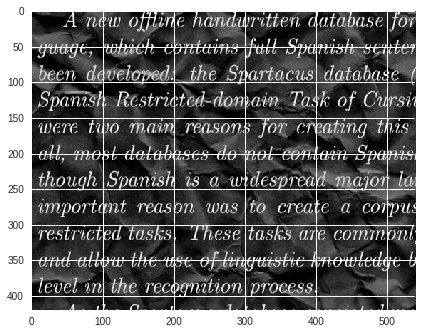

(420, 540, 1)


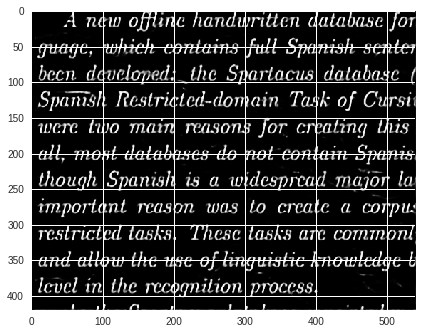

In [24]:
decoded_imgs = autoencoder.predict(x_test)

def show_img_from_np(x_test):
  from matplotlib import pyplot as plt
  first_array=x_test
  #Not sure you even have to do that if you just want to visualize it
  first_array=255*first_array
  #first_array=first_array.astype("uint8")
  print(first_array.shape)
  plt.imshow(first_array.reshape(420,540))
  plt.show()

show_img_from_np(x_test[31])
show_img_from_np(decoded_imgs[31])


# n = 2
# plt.figure(figsize=(540, 420))
# for i in range(n):
#     # display original
#     ax = plt.subplot(2, n, i+1)
#     plt.imshow(x_test[i].reshape(540, 420))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # display reconstruction
#     ax = plt.subplot(2, n, i + n)
#     plt.imshow(decoded_imgs[i].reshape(540, 420))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [59]:
#JUNK

from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(type(x_train))
print(x_train[1,1,1,1])

(50000, 32, 32, 3)
<class 'numpy.ndarray'>
153


In [69]:
#JUNK

# for f in os.listdir(imgdir_path):
#     out_path=imgdir_path+str(f)

#x = np.array([np.array(Image.open(fname)) for fname in filelist])
path='/content/datalab/train/'
x = [np.array(Image.open(path+f)) for f in os.listdir(path)]
print(x.shape)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

AttributeError: ignored

In [126]:
#JUNK
from skimage import io
all_images = np.empty((144,540,240,1))
t=0
for image_path in os.listdir(path):
  img = io.imread(path+image_path , as_grey=True)
  WIDTH = img.shape[0]
  HEIGHT = img.shape[1]
  img = img.reshape([WIDTH, HEIGHT, 1])
  #print(img[1,1,0])
  #all_images.append(img)
  np.append(all_images, img)
#   all_images[t,] = img
#   t+=1
x_train = np.array(all_images)
print(type(x_train))
print(all_images.shape)

<class 'numpy.ndarray'>
(144, 540, 240, 1)


In [125]:
#JUNK
print(x_train[2,2,2,0])

5.890846578250987e-130


In [11]:
def img2nparray(path):
  from scipy import ndimage
  from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
  import os
  import numpy as np

  train_files = []
  y_train = []
  i=0
  #for _file in onlyfiles:
  for _file in os.listdir(path):
      train_files.append(_file)
  #     label_in_file = _file.find("_")
  #     y_train.append(int(_file[0:label_in_file]))

  print("Files in train_files: {}".format(len(train_files)))

  # Original Dimensions
  image_width = 540
  image_height = 420
  # ratio = 4

  # image_width = int(image_width / ratio)
  # image_height = int(image_height / ratio)

  # channels = 3
  channels = 1
  # nb_classes = 1

  dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                       dtype=np.float32)

  i = 0
  for _file in train_files:
      img = load_img(path + "/" + _file,grayscale=True)  # this is a PIL image
      img.thumbnail((image_width, image_height))
      # Convert to Numpy Array
      x = img_to_array(img)  
  #     x = x.reshape((3, 120, 160))
  #     # Normalize
  #     x = (x - 128.0) / 128.0
      x = x / 256.0
      dataset[i] = x
      i += 1
      if i % 250 == 0:
          print("%d images to array" % i)
  print("All images to array!")
  return dataset

path='datalab/train'
X_train = img2nparray(path)
print(X_train.shape)
print(X_train[1,1,1,0])

path='datalab/train_cleaned'
y_train = img2nparray(path)
print(y_train.shape)
print(y_train[1,1,1,0])

path='datalab/test'
x_test = img2nparray(path)
print(x_test.shape)
print(x_test[1,1,1,0])

Files in train_files: 96
All images to array!
(96, 420, 540, 1)
0.91015625
Files in train_files: 96
All images to array!
(96, 420, 540, 1)
0.99609375
Files in train_files: 48
All images to array!
(48, 420, 540, 1)
0.9140625
